In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import pandas as pd


In [53]:
my_cols = ['Date', 'Temp', 'Hum']
df = pd.read_csv("IntCond.log", sep=",|]", names=my_cols, engine='python')

In [55]:
df.Date = pd.to_datetime(df.Date.str.strip('['))
df.Temp = df.Temp.str.strip('Temp: ').str.strip('F').astype(float)
df.Hum = df.Hum.str.strip('Hum: ').str.strip('%').astype(float)

In [73]:
df.loc[(df.Temp > 150) | (df.Temp < 30), 'Temp'] = np.nan
df.loc[df.Hum > 100, 'Hum'] = np.nan

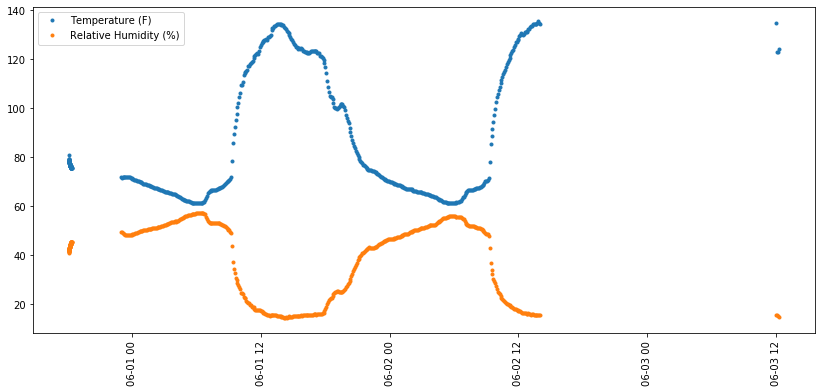

In [77]:
plt.figure(figsize=(14,6))
plt.plot(df.Date, df.Temp,'.', label='Temperature (F)')
plt.plot(df.Date, df.Hum, '.', label='Relative Humidity (%)')
plt.xticks(rotation=90)
plt.legend()
#plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.show()

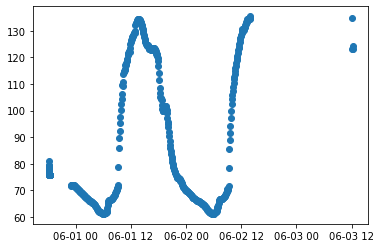

In [84]:
plt.plot_date(df.Date, df.Temp)